# Brief of Project

The project is made on Customer Churn Analysis. The project contains various markdown cells indicating starting of specific sections and brief methodology has also been reported for the same.

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [3]:
df=pd.read_csv('Dataset.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
df.shape

(7043, 21)

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Removing NULL Values

In [11]:
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(col,df[col].isna().sum())

Since there is no output this means the data we have doesn't contain NULL values. 

## Removing Duplicate Values

In [12]:
num_duplicates = df.duplicated().sum()
print(f"There are {num_duplicates} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


There are no duplicate rows 

## Detecting Outliers

In [28]:
columns=['tenure','MonthlyCharges','TotalCharges']
for col in columns:
    med=df['tenure'].median()
    fq=df['tenure'].quantile(0.25)
    tq=df['tenure'].quantile(0.75)
    iqr=tq-fq
    lower_bound = med - (1.5 * iqr)
    upper_bound = med + (1.5 * iqr)

    outlier_count = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)].shape[0]
    print(outlier_count)

0
0
0


No outliers in tenure,monthly billings and total billings of customer

Overall the dataset was really clean as it had no null values or  monthly billings or total billings 

# Exploratory Data Analysis

## Online Security vs Internet Service

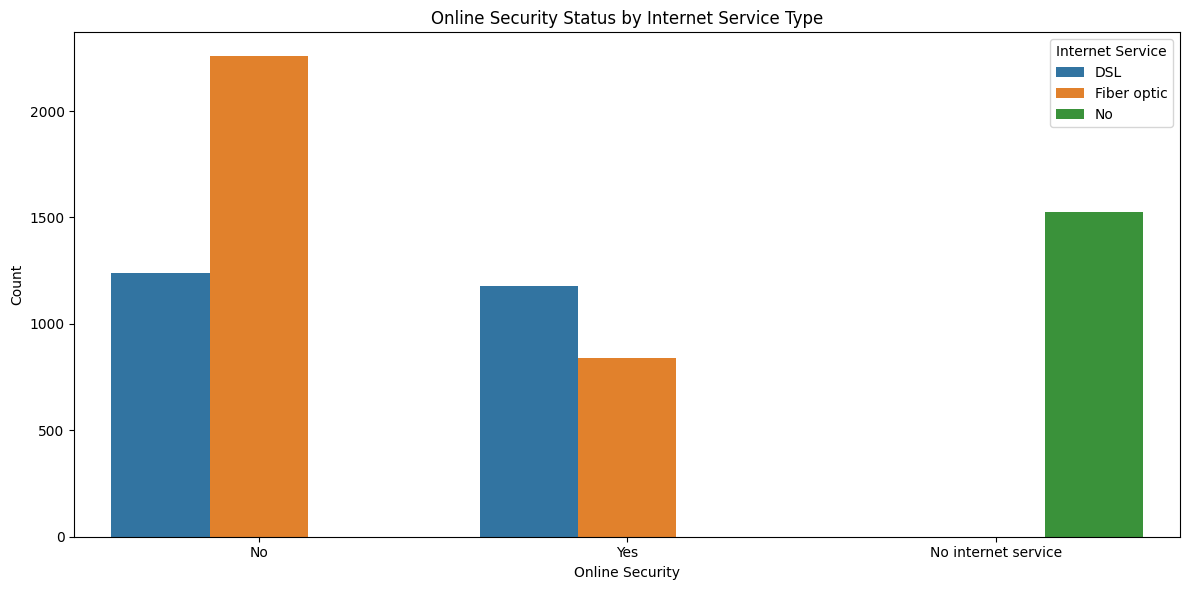

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', hue='InternetService', data=df)

plt.title('Online Security Status by Internet Service Type')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Internet Service')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Observations:
Most people who use fiber optic don't have internet service.

## Gender Proportion Analysis

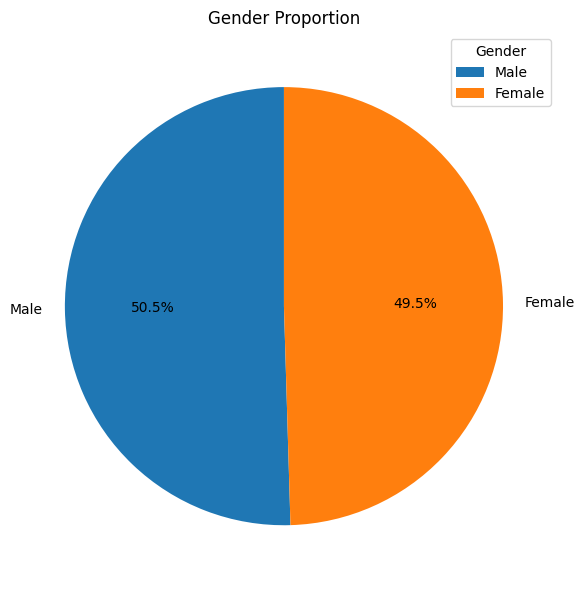

In [52]:
plt.figure(figsize=(12,6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Proportion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The dataset is almost balanced for male and female

## Online Security vs Online Backup

## Internet Service vs Online Backup

## Distribution of Contracts

## Distribution of Dependants

# Visualizations